In [125]:
# Zachary Humphries
# COMP 526
# 12/12/2022
# HW8 + Bonus

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import time
import math

In [126]:
def model(y,t):
    dydt = np.cos(t)
    return dydt

In [127]:
y0 = 0

t0 = 0
tf = 3*np.pi/2

h1 = 10**(-4)

num = int((tf-t0)/h1)

t = np.linspace(0, tf, num)

tic = time.perf_counter()
[y, output] = odeint(model,y0,t, h0 = 10**(-7), rtol = 10**(-4), atol = 10**(-7), full_output = True)
toc = time.perf_counter()

In [130]:
fig = plt.figure()
plt.plot(t,y, 'bo')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.close(fig)
fig.savefig('assign8_result.png')

fig1 = plt.figure()
plt.plot(t,np.sin(t), 'r')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.close(fig1)
fig.savefig('assign8_actual.png')


In [90]:
d = {'Solver': ['odeint'], 'rtol': [10**(-4)], 'atol': [10**(-7)], 'h0': [10**(-7)], \
     'mescd': [str(round(-1*math.log10(abs(y[-1]-np.sin(tf))/((10**(-7))+(10**(-4) * abs(np.sin(tf))))), 5))], \
     'scd': [str(round(-1*math.log10(abs(y[-1]-np.sin(tf))/abs(np.sin(tf))), 5))],\
     'steps': [sum(output['mused'])],\
     'feval': [sum(output['nfe'])],\
     'nJac': [sum(output['nje'])],\
     'CPU': [str(round(toc-tic, 5))]}


for key in d:
    print("{:<8}".format(key), end="| ")

print("-"*8*(len(d)+2))
    
for key in d:
    print("{:<8}".format(d[key][0]), end="| ")



4.584889709722384
Solver  | rtol    | atol    | h0      | mescd   | scd     | steps   | feval   | nJac    | CPU     | ------------------------------------------------------------------------------------------------
odeint  | 0.0001  | 1e-07   | 1e-07   | 0.58488 | 4.58444 | 47122   | 2435158 | 0       | 0.03232 | 

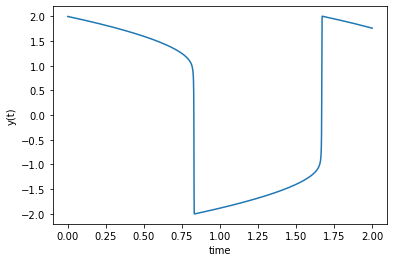

In [91]:
def vanderpol(y,t):
    dydt1 = y[1]; 
    dydt2 = ((1-(y[0]**2))*y[1] - y[0])/(10**(-3)); 

    dydt = [dydt1 , dydt2]; 
    return dydt

t0 = 0
tf = 2

h1 = 10**(-4)

num = int((tf-t0)/h1)

t = np.linspace(0, tf, num)

tic = time.perf_counter()
[y, output] = odeint(vanderpol,[2,0],t, h0 = 10**(-7), rtol = 10**(-4), atol = 10**(-7), full_output = True)
toc = time.perf_counter()

plt.plot(t,y[:,0])
plt.xlabel('time')
plt.ylabel("y(t)")
plt.savefig('assign8_bonus.png')

In [93]:
ref = 0.1706167732170483 * 10

mescd = -1*math.log10(abs((abs(y[-1][0]-ref)/(((10**(-7))/(10**(-4)))+abs(ref)))))

d = {'Solver': ['odeint'], 'rtol': [10**(-4)], 'atol': [10**(-7)], 'h0': [10**(-7)], \
     'mescd': [str(round(-1*math.log10(abs(y[-1][0]-ref)/((10**(-7))+(10**(-4) * abs(ref)))), 5))], \
     'scd': [str(round(-1*math.log10(abs(y[-1][0]-ref)/abs(ref)), 5))],\
     'steps': [sum(output['mused'])],\
     'feval': [sum(output['nfe'])],\
     'nJac': [sum(output['nje'])],\
     'CPU': [str(round(toc-tic, 5))]}

for key in d:
    print("{:<8}".format(key), end="| ")

print("-"*8*(len(d)+2))
    
for key in d:
    print("{:<8}".format(d[key][0]), end="| ")


1.4810541242767217
Solver  | rtol    | atol    | h0      | mescd   | scd     | steps   | feval   | nJac    | CPU     | ------------------------------------------------------------------------------------------------
odeint  | 0.0001  | 1e-07   | 1e-07   | -2.51895| 1.4808  | 39676   | 9251551 | 459357  | 0.01826 | 

In [132]:
for key in d:
    print("{:<8}".format(key), end="| ")

Solver  | rtol    | atol    | h0      | mescd   | scd     | steps   | feval   | nJac    | CPU     | 